<a href="https://colab.research.google.com/github/BACHUBHAVANA/CodeQuest_Using_ML/blob/main/Problem_Statement2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
   Student_ID  Batch  Predicted Score
7        3238   2022        25.372038
4        3221   2021        22.758478
0        3209   2021        20.701071


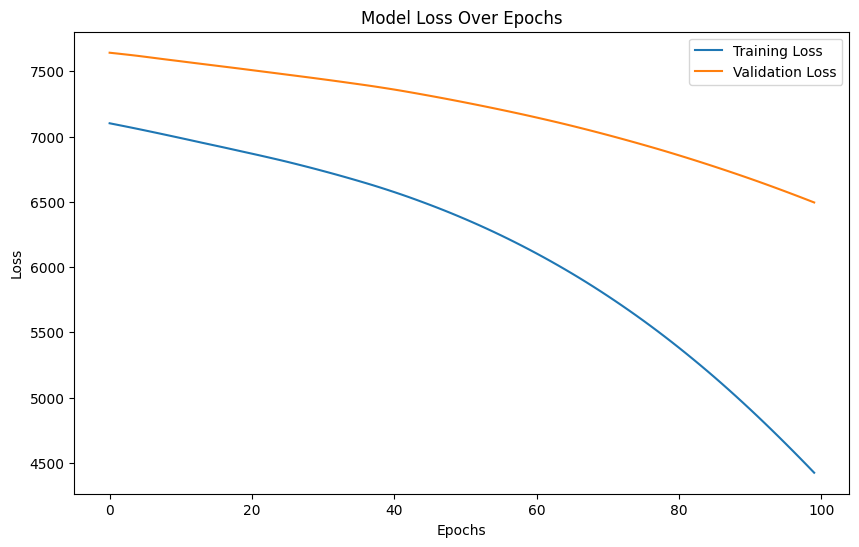

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


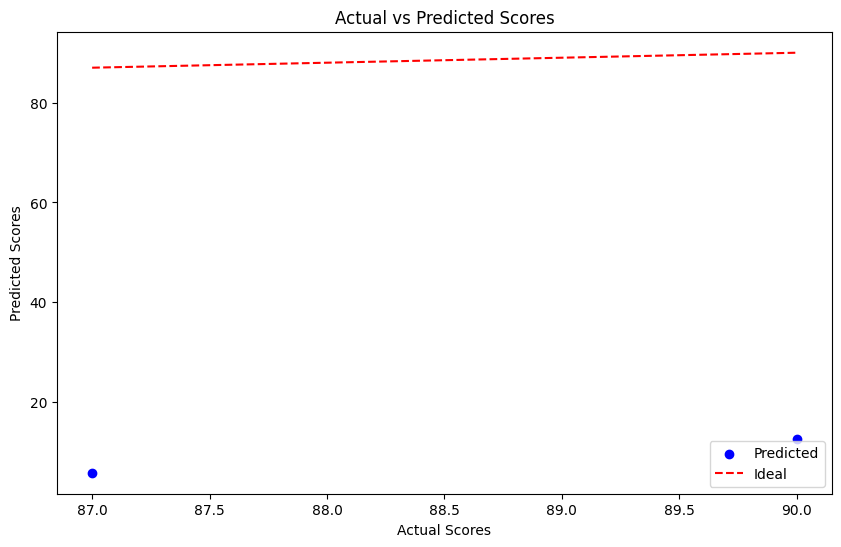

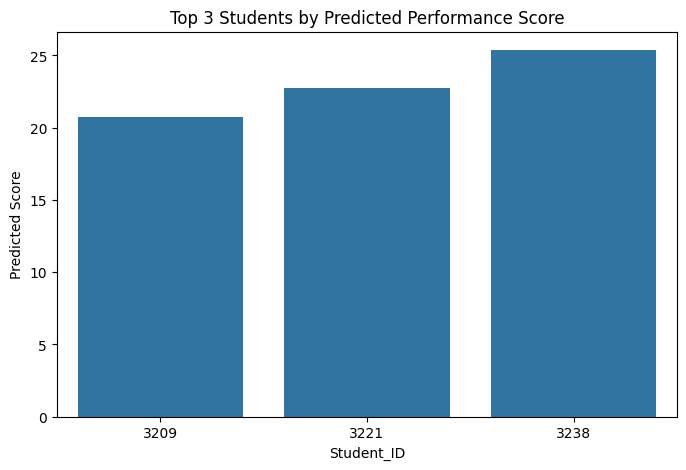

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('/content/student_Performance.csv')

# Preprocessing
features = [
    'GPA semester1',
    'GPA semester2',
    'GPA semester3',
    'Hackathons Participated',
    'Core Course Excellence (0-10)',
    'Papers Presented',
    'Assisting Teachers (Semesters)'
]
X = data[features]
y = data['Overall Performance Score']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and train the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with validation
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

# Predict overall scores for all students
data['Predicted Score'] = model.predict(X_scaled)

# Output top 3 students
top_3_students = data.nlargest(3, 'Predicted Score')
print(top_3_students[['Student_ID', 'Batch', 'Predicted Score']])

#  Visualizations

# 1. Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2. Actual vs Predicted Scores (for test data)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()
plt.show()

# 3. Bar chart of top 3 students' predicted scores
plt.figure(figsize=(8, 5))
sns.barplot(x='Student_ID', y='Predicted Score', data=top_3_students)
plt.title('Top 3 Students by Predicted Performance Score')
plt.ylabel('Predicted Score')
plt.show()
